In [65]:
#  链家爬虫
from lxml import etree
import csv
import requests
from tqdm import tqdm  # 爬取进度条显示模块

print('信息爬取中:\n')


class HouseParse(object):
    # 初始化
    def __init__(self):
        # 请求头
        self.headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.55 Safari/537.36 Edg/96.0.1054.43'
        }
        # 列表存放数据
        self.data_list = []

    def Sponsor(self):
        # 翻页数据
        for i in tqdm(range(1, 101)):
            url = f'https://changzhou.lianjia.com/ershoufang/rs{i}/'
            response = requests.get(url=url, headers=self.headers)

            html = etree.HTML(response.content.decode('utf-8'))
            #找到内容所在的li标签下
            elements = html.xpath('//div/ul[@class="sellListContent"]/li')
            # print(elements)
            for element in elements:
                #创建字典
                dict_ = {}
                #标题
                dict_['title'] = element.xpath('./div[1]/div[1]/a/text()')[0]
                #地址
                dict_['flood'] = ''.join([i.strip() for i in element.xpath('./div[1]/div[@class="flood"]//text()')])
                #简介
                dict_['introduction'] = element.xpath('./div[1]/div[@class="address"]/div/text()')[0]

                #总价
                dict_['total_price'] = ''.join([i.strip() for i in element.xpath('.//div[@class="totalPrice totalPrice2"]/span/text()')])
                #单价
                dict_['unit_price'] = ''.join([i.strip() for i in element.xpath('.//div[@class="unitPrice"]/span/text()')])
                # print(dict_)
                self.data_list.append(dict_)

                ''' L = dict_['introduction'][0].split('|')
                dict_['model'] = L[0].strip()
                dict_['area'] = L[1].strip()
                dict_['direction'] = L[2].strip()
                dict_['perfect'] = L[3].strip()
                dict_['floor'] = L[4].strip()'''


    def save_data(self):
        #保存数据
        with open('lianjia.csv', 'w', encoding='utf-8', newline='')as f:
            writer = csv.DictWriter(f, fieldnames=['title', 'flood', 'introduction','total_price','unit_price'])
            writer.writeheader()
            writer.writerows(self.data_list)

    def main(self):
        self.Sponsor()
        self.save_data()

if __name__ == '__main__':
    house = HouseParse()
    house.main()

print('\n爬取成功！')



信息爬取中:



100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:54<00:00,  1.83it/s]


爬取成功！


In [1]:
#  导入lianjia.csv
import pandas as pd
colname=['标题','地段','简要信息','总价（万元）','单位价格（元/㎡）']
data = pd.read_csv( 'lianjia.csv',names=colname)
print(data)

                               标题             地段  \
0                           title          flood   
1       （天隽峰2-1-1-1 76.88m² 140 万        天隽峰-湖塘镇   
2    景瑞英郡花苑3-2-1-1 113.80m² 两朝南户型      景瑞英郡花苑-北港   
3     香缇湾花园3-2-1-1 113.00m² 195 万       香缇湾花园-红梅   
4                      大圩沟 1室1厅 南         大圩沟-红梅   
..                            ...            ...   
714    文昌花园4-2-1-2 157.09m² 100 万      文昌花园-西城街道   
715      青枫公园金玉苑出售。带100平左右大露台，双阳台         金玉苑-北港   
716       此房交通便利，地铁口距离100米，交通出行方便        凤凰名城-新桥   
717  房东诚心出售 金禧园100平  户型好 新精装 拎包入住  金禧园(金坛市)-东城街道   
718     诚心出售！此房价格面谈为主，100、%要看这个房源      新北万达广场-三井   

                                              简要信息       总价（万元）   单位价格（元/㎡）  
0                                     introduction  total_price  unit_price  
1      2室1厅 | 76.88平米 | 南 | 简装 | 低楼层(共34层)  | 板塔结合          115   14,959元/平  
2    3室2厅 | 113.8平米 | 南 北 | 精装 | 高楼层(共32层)  | 板塔结合          157   13,797元/平  
3      3室2厅 | 113平米 | 南 北 | 毛坯 | 高楼层(共26层)  | 板塔结合          155

In [2]:
houselist=data.drop([0],axis=0)# 第0行为原标题，在此处应去除
print(houselist)

                               标题             地段  \
1       （天隽峰2-1-1-1 76.88m² 140 万        天隽峰-湖塘镇   
2    景瑞英郡花苑3-2-1-1 113.80m² 两朝南户型      景瑞英郡花苑-北港   
3     香缇湾花园3-2-1-1 113.00m² 195 万       香缇湾花园-红梅   
4                      大圩沟 1室1厅 南         大圩沟-红梅   
5                     府琛花园 3室1厅 南        府琛花园-三井   
..                            ...            ...   
714    文昌花园4-2-1-2 157.09m² 100 万      文昌花园-西城街道   
715      青枫公园金玉苑出售。带100平左右大露台，双阳台         金玉苑-北港   
716       此房交通便利，地铁口距离100米，交通出行方便        凤凰名城-新桥   
717  房东诚心出售 金禧园100平  户型好 新精装 拎包入住  金禧园(金坛市)-东城街道   
718     诚心出售！此房价格面谈为主，100、%要看这个房源      新北万达广场-三井   

                                              简要信息 总价（万元）  单位价格（元/㎡）  
1      2室1厅 | 76.88平米 | 南 | 简装 | 低楼层(共34层)  | 板塔结合    115  14,959元/平  
2    3室2厅 | 113.8平米 | 南 北 | 精装 | 高楼层(共32层)  | 板塔结合    157  13,797元/平  
3      3室2厅 | 113平米 | 南 北 | 毛坯 | 高楼层(共26层)  | 板塔结合    155  13,717元/平  
4        1室1厅 | 38.5平米 | 南 | 简装 | 中楼层(共5层)  | 暂无数据    110  28,572元/平  
5          3室1厅 | 14

In [3]:
houselist=houselist.drop([255],axis=0)  
houselist=houselist.drop([309],axis=0) 
houselist=houselist.drop([310],axis=0) 
houselist=houselist.drop([334],axis=0) # 第256、310、311、335行数据为车位出售
houselist=houselist.drop([141],axis=0)
houselist=houselist.drop([143],axis=0)
houselist=houselist.drop([327],axis=0)
houselist=houselist.drop([655],axis=0) # 第142、144、328、656行数据为异常值
houselist=houselist.drop('标题',axis=1)
print(houselist)

                地段                                           简要信息 总价（万元）  \
1          天隽峰-湖塘镇    2室1厅 | 76.88平米 | 南 | 简装 | 低楼层(共34层)  | 板塔结合    115   
2        景瑞英郡花苑-北港  3室2厅 | 113.8平米 | 南 北 | 精装 | 高楼层(共32层)  | 板塔结合    157   
3         香缇湾花园-红梅    3室2厅 | 113平米 | 南 北 | 毛坯 | 高楼层(共26层)  | 板塔结合    155   
4           大圩沟-红梅      1室1厅 | 38.5平米 | 南 | 简装 | 中楼层(共5层)  | 暂无数据    110   
5          府琛花园-三井        3室1厅 | 142平米 | 南 | 精装 | 中楼层(共11层)  | 板楼    245   
..             ...                                            ...    ...   
714      文昌花园-西城街道    4室2厅 | 157.09平米 | 南 | 精装 | 高楼层(共5层)  | 暂无数据     98   
715         金玉苑-北港       2室2厅 | 95.15平米 | 南 | 精装 | 低楼层(共9层)  | 板楼    134   
716        凤凰名城-新桥       2室2厅 | 83.5平米 | 南 | 简装 | 高楼层(共30层)  | 塔楼    125   
717  金禧园(金坛市)-东城街道      2室2厅 | 99.4平米 | 南 | 精装 | 低楼层(共5层)  | 板塔结合   86.8   
718      新北万达广场-三井       1室1厅 | 59.6平米 | 南 | 简装 | 高楼层(共31层)  | 塔楼     59   

     单位价格（元/㎡）  
1    14,959元/平  
2    13,797元/平  
3    13,717元/平  
4    28,572元/平  
5 

In [4]:
#  对‘简要信息’进行处理
house_info=houselist['简要信息'].str.split('|', expand=True)

In [5]:
house_info.name=['户型','面积（㎡）','朝向','装修情况','楼层','结构']
house_info.columns=house_info.name
print(house_info)

        户型       面积（㎡）     朝向  装修情况            楼层     结构
1    2室1厅     76.88平米      南    简装    低楼层(共34层)     板塔结合
2    3室2厅     113.8平米    南 北    精装    高楼层(共32层)     板塔结合
3    3室2厅       113平米    南 北    毛坯    高楼层(共26层)     板塔结合
4    1室1厅      38.5平米      南    简装     中楼层(共5层)     暂无数据
5    3室1厅       142平米      南    精装    中楼层(共11层)       板楼
..     ...         ...    ...   ...           ...    ...
714  4室2厅    157.09平米      南    精装     高楼层(共5层)     暂无数据
715  2室2厅     95.15平米      南    精装     低楼层(共9层)       板楼
716  2室2厅      83.5平米      南    简装    高楼层(共30层)       塔楼
717  2室2厅      99.4平米      南    精装     低楼层(共5层)     板塔结合
718  1室1厅      59.6平米      南    简装    高楼层(共31层)       塔楼

[710 rows x 6 columns]


C:\Users\ASUS\AppData\Local\Temp/ipykernel_12536/2192104355.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  house_info.name=['户型','面积（㎡）','朝向','装修情况','楼层','结构']


In [6]:
house_info['室数'] = house_info['户型'].str[0]
house_info['厅数'] = house_info['户型'].str[2]

In [7]:
print(house_info)

        户型       面积（㎡）     朝向  装修情况            楼层     结构 室数 厅数
1    2室1厅     76.88平米      南    简装    低楼层(共34层)     板塔结合  2  1
2    3室2厅     113.8平米    南 北    精装    高楼层(共32层)     板塔结合  3  2
3    3室2厅       113平米    南 北    毛坯    高楼层(共26层)     板塔结合  3  2
4    1室1厅      38.5平米      南    简装     中楼层(共5层)     暂无数据  1  1
5    3室1厅       142平米      南    精装    中楼层(共11层)       板楼  3  1
..     ...         ...    ...   ...           ...    ... .. ..
714  4室2厅    157.09平米      南    精装     高楼层(共5层)     暂无数据  4  2
715  2室2厅     95.15平米      南    精装     低楼层(共9层)       板楼  2  2
716  2室2厅      83.5平米      南    简装    高楼层(共30层)       塔楼  2  2
717  2室2厅      99.4平米      南    精装     低楼层(共5层)     板塔结合  2  2
718  1室1厅      59.6平米      南    简装    高楼层(共31层)       塔楼  1  1

[710 rows x 8 columns]


In [8]:
house=houselist.join(house_info)
house=house.drop('简要信息',axis=1)
print(house)

                地段 总价（万元）  单位价格（元/㎡）     户型       面积（㎡）     朝向  装修情况  \
1          天隽峰-湖塘镇    115  14,959元/平  2室1厅     76.88平米      南    简装    
2        景瑞英郡花苑-北港    157  13,797元/平  3室2厅     113.8平米    南 北    精装    
3         香缇湾花园-红梅    155  13,717元/平  3室2厅       113平米    南 北    毛坯    
4           大圩沟-红梅    110  28,572元/平  1室1厅      38.5平米      南    简装    
5          府琛花园-三井    245  17,254元/平  3室1厅       142平米      南    精装    
..             ...    ...        ...    ...         ...    ...   ...   
714      文昌花园-西城街道     98   6,239元/平  4室2厅    157.09平米      南    精装    
715         金玉苑-北港    134  14,084元/平  2室2厅     95.15平米      南    精装    
716        凤凰名城-新桥    125  14,971元/平  2室2厅      83.5平米      南    简装    
717  金禧园(金坛市)-东城街道   86.8   8,733元/平  2室2厅      99.4平米      南    精装    
718      新北万达广场-三井     59   9,900元/平  1室1厅      59.6平米      南    简装    

               楼层     结构 室数 厅数  
1     低楼层(共34层)     板塔结合  2  1  
2     高楼层(共32层)     板塔结合  3  2  
3     高楼层(共26层)     板塔结合  3  2  
4  

In [9]:
print(house.dtypes)  # 数据类型

地段           object
总价（万元）       object
单位价格（元/㎡）    object
户型           object
面积（㎡）        object
朝向           object
装修情况         object
楼层           object
结构           object
室数           object
厅数           object
dtype: object


In [10]:
#  部分数据类型转换以及部分数据处理
house['总价（万元）']=house['总价（万元）'].astype(float)
house['单位价格（元/㎡）'] = house['单位价格（元/㎡）'].str[:-3]
house['单位价格（元/㎡）'] = house['单位价格（元/㎡）'].str.replace(',', '').astype(float)
house['面积（㎡）'] = house['面积（㎡）'].str[:-3]
house['面积（㎡）'] = house['面积（㎡）'].str.replace(',', '').astype(float)
house['室数']=house['室数'].astype('int')
house['厅数']=house['厅数'].astype('int')
house['楼层'] = house['楼层'].str[:4]

In [11]:
print(house.dtypes)

地段            object
总价（万元）       float64
单位价格（元/㎡）    float64
户型            object
面积（㎡）        float64
朝向            object
装修情况          object
楼层            object
结构            object
室数             int32
厅数             int32
dtype: object


In [12]:
print(house)

                地段  总价（万元）  单位价格（元/㎡）     户型   面积（㎡）     朝向  装修情况    楼层  \
1          天隽峰-湖塘镇   115.0    14959.0  2室1厅    76.88     南    简装    低楼层   
2        景瑞英郡花苑-北港   157.0    13797.0  3室2厅   113.80   南 北    精装    高楼层   
3         香缇湾花园-红梅   155.0    13717.0  3室2厅   113.00   南 北    毛坯    高楼层   
4           大圩沟-红梅   110.0    28572.0  1室1厅    38.50     南    简装    中楼层   
5          府琛花园-三井   245.0    17254.0  3室1厅   142.00     南    精装    中楼层   
..             ...     ...        ...    ...     ...    ...   ...   ...   
714      文昌花园-西城街道    98.0     6239.0  4室2厅   157.09     南    精装    高楼层   
715         金玉苑-北港   134.0    14084.0  2室2厅    95.15     南    精装    低楼层   
716        凤凰名城-新桥   125.0    14971.0  2室2厅    83.50     南    简装    高楼层   
717  金禧园(金坛市)-东城街道    86.8     8733.0  2室2厅    99.40     南    精装    低楼层   
718      新北万达广场-三井    59.0     9900.0  1室1厅    59.60     南    简装    高楼层   

        结构  室数  厅数  
1     板塔结合   2   1  
2     板塔结合   3   2  
3     板塔结合   3   2  
4     暂无数据   1 

In [13]:
#  描述统计
des=house.describe().round(2)
print(des)

        总价（万元）  单位价格（元/㎡）   面积（㎡）      室数      厅数
count   710.00     710.00  710.00  710.00  710.00
mean    182.61   17277.18  106.67    2.81    1.66
std     139.06    9807.48   56.94    1.26    0.58
min      19.80    4369.00   18.00    1.00    0.00
25%      96.00   10919.00   80.37    2.00    1.00
50%     150.00   15298.50   92.00    3.00    2.00
75%     230.00   19851.50  122.80    3.00    2.00
max    1410.00   61920.00  575.00    9.00    4.00


In [14]:
#  相关分析
house_corr=house.corr()
print(house_corr)

             总价（万元）  单位价格（元/㎡）     面积（㎡）        室数        厅数
总价（万元）     1.000000   0.563748  0.718825  0.574768  0.322565
单位价格（元/㎡）  0.563748   1.000000 -0.030187  0.032197 -0.058003
面积（㎡）      0.718825  -0.030187  1.000000  0.747567  0.497922
室数         0.574768   0.032197  0.747567  1.000000  0.524129
厅数         0.322565  -0.058003  0.497922  0.524129  1.000000


C:\Users\ASUS\AppData\Local\Temp/ipykernel_12536/1022317506.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  house_corr=house.corr()


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


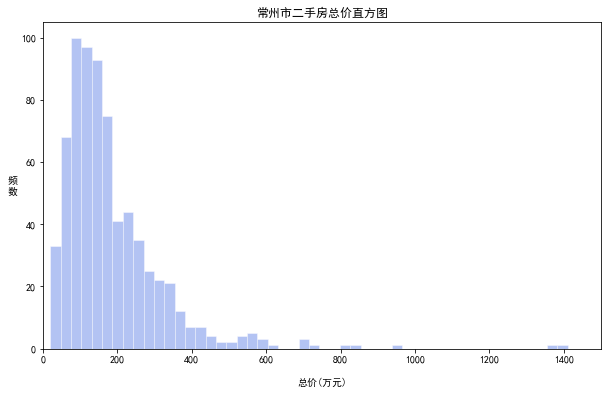

In [15]:
#  可视化
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#  常州市二手房总价直方图
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(10,6))
plt.title("常州市二手房总价直方图")
sns.distplot(house['总价（万元）'], color="royalblue",bins=50, kde=False, hist_kws={"edgecolor":"w"})
plt.xlabel("\n总价(万元)")
plt.ylabel("频\n数", rotation = 'horizontal', verticalalignment = 'center', horizontalalignment = 'right')
plt.xlim(0,1500)  # 总价最大值为1410万元，故此处设置总价区间为0-1500万元
plt.show()
plt.figure(figsize=(10,6))
#  常州市二手房单位价格直方图
plt.title("常州市二手房单位价格直方图")
sns.distplot(house['单位价格（元/㎡）'], color="royalblue",bins=20, kde=True, hist_kws={"edgecolor":"w"})
plt.xlabel("\n单位价格（元/㎡）")
plt.ylabel("频\n数", rotation = 'horizontal', verticalalignment = 'center', horizontalalignment = 'right')
yticks_list = ['0', '100', '200', '300', '400']
plt.yticks(np.arange(0.0, 0.00010, 0.00002), yticks_list)
plt.xlim(0,65000) # 总价最大值为61920万元，故此处设置总价区间为0-65000万元
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


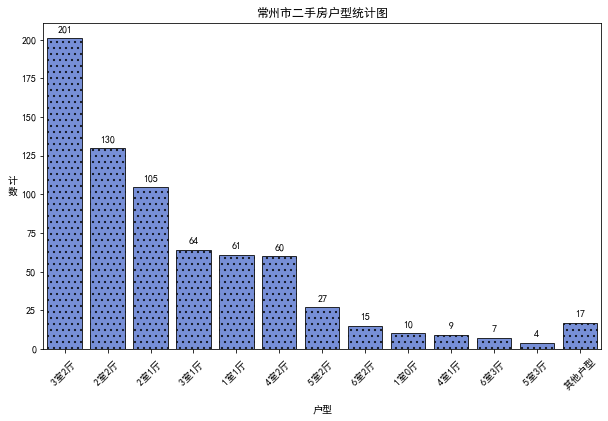

In [16]:
#  常州市二手房户型统计图
huxingName = list(house['户型'].value_counts().index)
huxingCountList = list(house['户型'].value_counts())
# 户型数量较少的合并为其他户型
otherCount = sum(huxingCountList[12:])
huxingName = huxingName[:12]
huxingCountList = huxingCountList[:12]
huxingName.append("其他户型")
huxingCountList.append(otherCount)

plt.figure(figsize=(10,6))
plt.title("常州市二手房户型统计图")
g = sns.barplot(huxingName, huxingCountList, alpha=0.8, color="royalblue",edgecolor="k",hatch="..")
plt.xlabel("\n户型")
plt.ylabel("计\n数", rotation = 'horizontal', verticalalignment = 'center', horizontalalignment = 'right')
for a,b in zip(range(len(huxingName)),huxingCountList):   #柱子上的数字显示
    plt.text(a,b+3,'%.f' % b,ha='center',va='bottom',fontsize=10);
plt.xticks(rotation = 45)
plt.show()

In [17]:
#  常州市二手房建筑面积直方图
plt.figure(figsize=(10,6))
plt.title("常州市二手房建筑面积直方图")
sns.distplot(house['面积（㎡）'], color="royalblue",bins=25, kde=False, hist_kws={"edgecolor":"w"})
plt.xlabel("\n房屋面积（㎡）")
plt.ylabel("频\n数", rotation = 'horizontal', verticalalignment = 'center', horizontalalignment = 'right')
plt.xlim(0,600) # 面积最大值为575m²，故此处设置总价区间为0-600万元
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [18]:
#  常州市二手房面积-单位价格散点图
plt.figure(figsize=(10,6))
plt.title("常州市二手房面积-单位价格散点图")
plt.scatter(house['面积（㎡）'], house['单位价格（元/㎡）'],color="royalblue")
plt.xlabel("\n房屋面积（㎡）")
plt.ylabel("单位价格\n（元/㎡）", rotation = 'horizontal', verticalalignment = 'center', horizontalalignment = 'right')
plt.show()

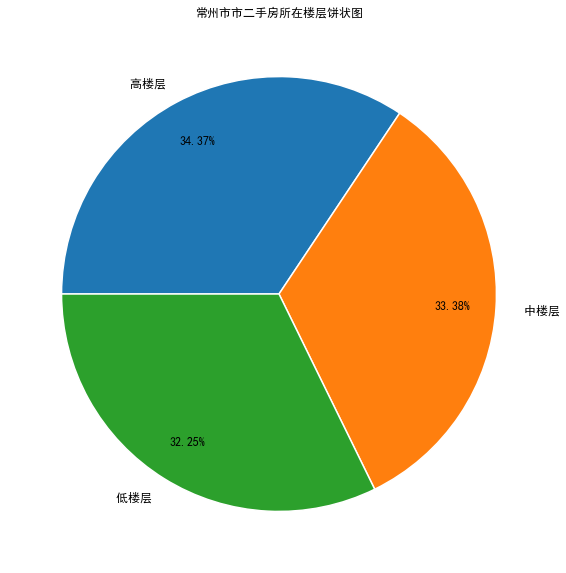

In [19]:
#  常州市市二手房所在楼层饼状图
plt.figure(figsize=(12,10))
plt.title("常州市市二手房所在楼层饼状图")
louceng2 = house['楼层'].value_counts()
plt.pie(louceng2, labels = louceng2.index, autopct='%.2f%%', # 设置百分比的格式，这里保留一位小数
        pctdistance=0.8,  # 设置百分比标签与圆心的距离
        labeldistance = 1.1, # 设置教育水平标签与圆心的距离
        startangle = 180, # 设置饼图的初始角度
        counterclock = False, # 是否逆时针，这里设置为顺时针方向
        wedgeprops = {'linewidth': 1.5, 'edgecolor':'w'},# 设置饼图内外边界的属性值
        textprops = {'fontsize':12, 'color':'black'}, # 设置文本标签的属性值
       )
plt.show()

In [20]:
#  总价回归分析
import statsmodels as sm
sample1 = house[['室数','厅数','面积（㎡）','总价（万元）']].dropna()
y1 = sample1[['总价（万元）']]
x1 = sample1[['室数','厅数','面积（㎡）']]
x10 = sm.add_constant(x1)
# ols模型 y = ax + x，其中xe是常数项
est1 = sm.OLS(y1, x10) .fit()
est1 . summary()

AttributeError: module 'statsmodels' has no attribute 'add_constant'

In [21]:
import statsmodels.api as sm
sample2 = house[['室数','厅数','面积（㎡）','单位价格（元/㎡）']].dropna()
y2 = sample2[['单位价格（元/㎡）']]
x2 = sample2[['室数','厅数','面积（㎡）']]
x20 = sm.add_constant(x)
# ols模型 y = ax + x，其中xe是常数项
est2 = sm.OLS(y2, x20) .fit()
est2 . summary()

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


ImportError: cannot import name '_initialization' from 'statsmodels.tsa.statespace' (C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\__init__.py)